R² Score: 0.990
RMSE: 0.51 mpg
MAE: 0.06 mpg


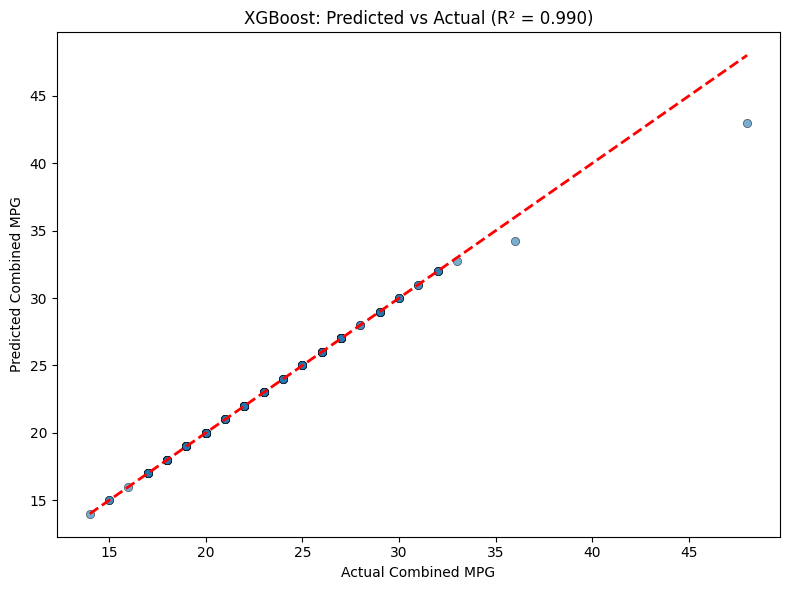

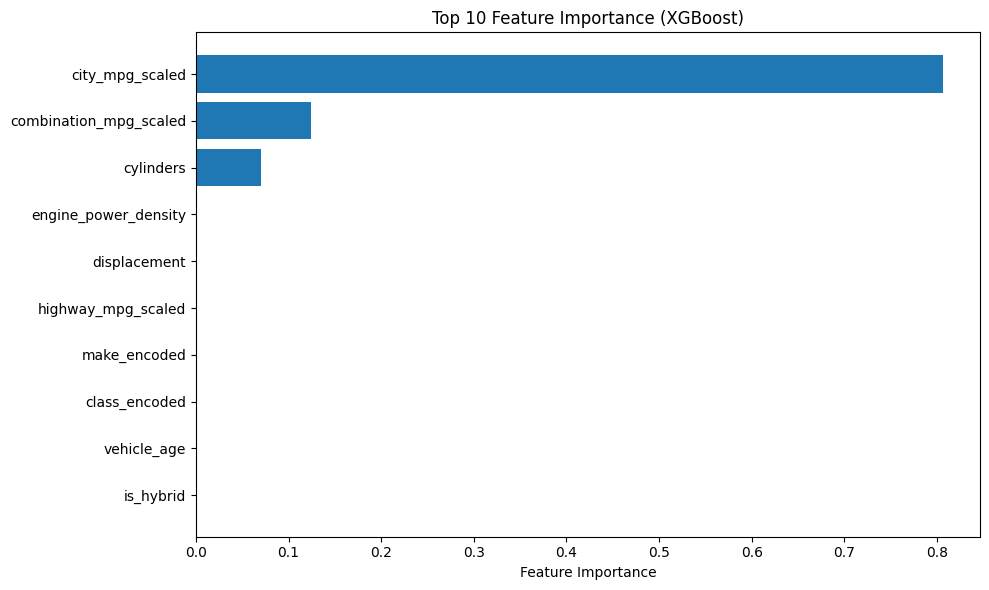

Train Score: 1.000
Test Score: 0.990


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv('Car Data P.csv')

# Define target
target = 'combination_mpg'

# Columns to drop: identifiers, raw mpg values, direct derivatives, and original categorical strings
cols_to_drop = [
    'make', 'model',                     # identifiers
    'city_mpg', 'highway_mpg',            # other mpg measures (leakage)
    'mpg_diff',                            # derived from target
    'engine_efficiency',                   # likely derived (combination_mpg / displacement)
    'fuel_efficiency_category',            # categorical derived from mpg
    'class', 'drive', 'fuel_type', 'transmission', 'size_category', 'drivetrain_type',  # raw categoricals
    'year',                                 # keep scaled version
]

# Keep: all binary flags, encoded columns, and scaled numeric features
feature_cols = [col for col in df.columns if col not in cols_to_drop and col != target]

# Build feature matrix and target
X = df[feature_cols]
y = df[target]

# Ensure all features are numeric (drop any remaining object columns)
X = X.select_dtypes(include=[np.number])

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train XGBoost regressor
model = XGBRegressor(random_state=42, verbosity=0, n_estimators=100)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f} mpg")
print(f"MAE: {mae:.2f} mpg")

# --- Plot 1: Predicted vs Actual ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Combined MPG')
plt.ylabel('Predicted Combined MPG')
plt.title(f'XGBoost: Predicted vs Actual (R² = {r2:.3f})')
plt.tight_layout()
plt.savefig('car_pred_vs_actual.png', dpi=150)
plt.show()

# --- Plot 2: Feature Importance (Top 10) ---
importance = model.feature_importances_
indices = np.argsort(importance)[::-1][:10]  # top 10
top_features = [X.columns[i] for i in indices]
top_importance = importance[indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_importance[::-1], align='center')
plt.yticks(range(len(top_features)), top_features[::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance (XGBoost)')
plt.tight_layout()
plt.savefig('car_feature_importance.png', dpi=150)
plt.show()

Train_Score = model.score(X_train, y_train)
Test_Score = model.score(X_test, y_test)
print(f"Train Score: {Train_Score:.3f}")
print(f"Test Score: {Test_Score:.3f}")